# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [2]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path

%matplotlib inline

In [3]:
from panel.interact import interact
from panel import widgets

In [4]:
# Read the Mapbox API key
# Run . keys.sh file that contains MAPBOX_API_KEY = "..."
mapbox_token = os.getenv("MAPBOX_API_KEY")

## Load Data

In [5]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [6]:
# Calculate the mean number of housing units per year (hint: use groupby) 
 # Slice for housing units per year    
housing_units_grp = (
    sfo_data[["housing_units"]] 
    .groupby([sfo_data.index])
    ).mean()
housing_units_grp.reset_index(inplace=True)  
housing_units_grp.head()

year  housing_units
0  2010         372560
1  2011         374507
2  2012         376454
3  2013         378401
4  2014         380348

In [7]:
housing_units_grp.min()

year               2010
housing_units    372560
dtype: int64

In [8]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# Use rot and yformatter attributes/options
plot_housing_units_grp = housing_units_grp.hvplot.bar(
    label="Figure 1a. Housing Units Per Year",
    x="year", y="housing_units", rot=45 
    ).opts(yformatter="%.0f",
    line_color="red",
    hover_line_color="green",
    bgcolor="lightgrey"
    )
plot_housing_units_grp

:Bars   [year]   (housing_units)

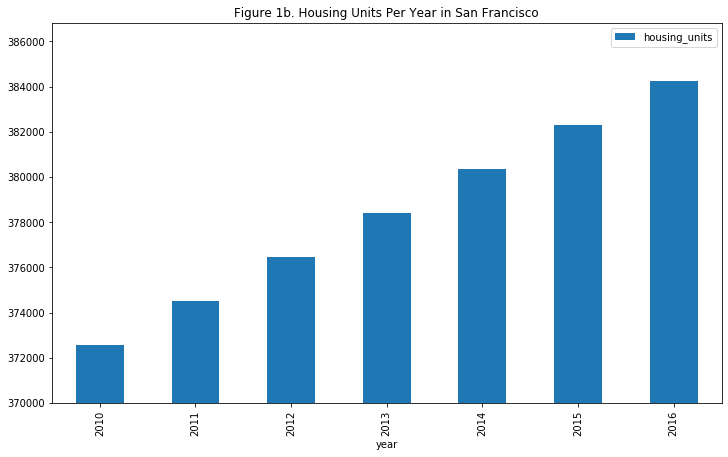

In [9]:
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
import matplotlib.pyplot as plt

housing_units_filtered = sfo_data.filter(['year','housing_units']).groupby([sfo_data.index]).mean()

padding = housing_units_filtered['housing_units'].std()
mean = housing_units_filtered.mean()['housing_units']

# plot bar chart based on 95.45% of the population being covered within +/- two standard deviations from the mean
plot_housing_units_grp_scaled = housing_units_filtered.plot.bar(
    ylim=(mean-2*padding, mean+2*padding), 
    title="Figure 1b. Housing Units Per Year in San Francisco",
    figsize=(12,7))
plt.show()

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [10]:
# Calculate the average gross rent and average sale price per square foot
gross_rent_grp = (
    sfo_data[["gross_rent"]] 
    .groupby([sfo_data.index])
    ).mean()
gross_rent_grp.reset_index(inplace=True)  
gross_rent_grp.head()

year  gross_rent
0  2010        1239
1  2011        1530
2  2012        2324
3  2013        2971
4  2014        3528

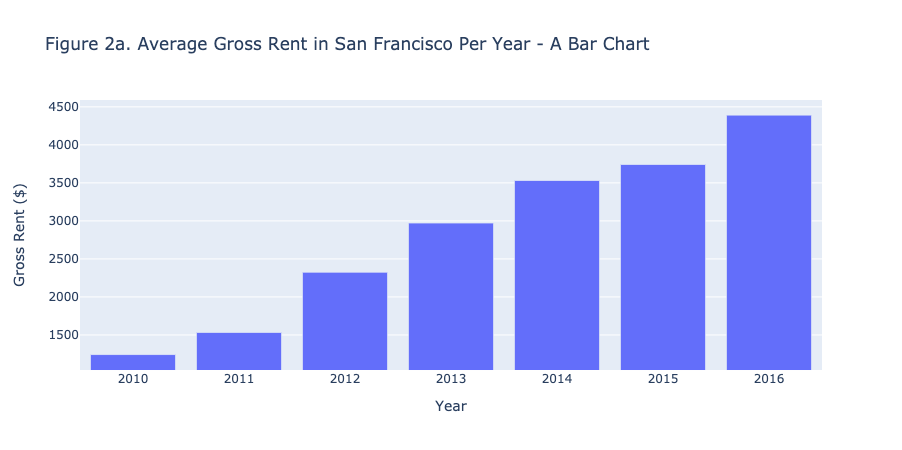

In [11]:
# Plot the Average Gross Rent per Year as a Bar Chart 
padding_rent = 200
min = gross_rent_grp.min()["gross_rent"] - padding_rent
max = gross_rent_grp.max()["gross_rent"] + padding_rent
    
plot_gross_rent_bar = px.bar(
    gross_rent_grp, x="year", y="gross_rent", title="Figure 2a. Average Gross Rent in San Francisco Per Year - A Bar Chart",
    range_y = [min, max],
    labels={"year": "Year", "gross_rent": "Gross Rent ($)"},
)
plot_gross_rent_bar

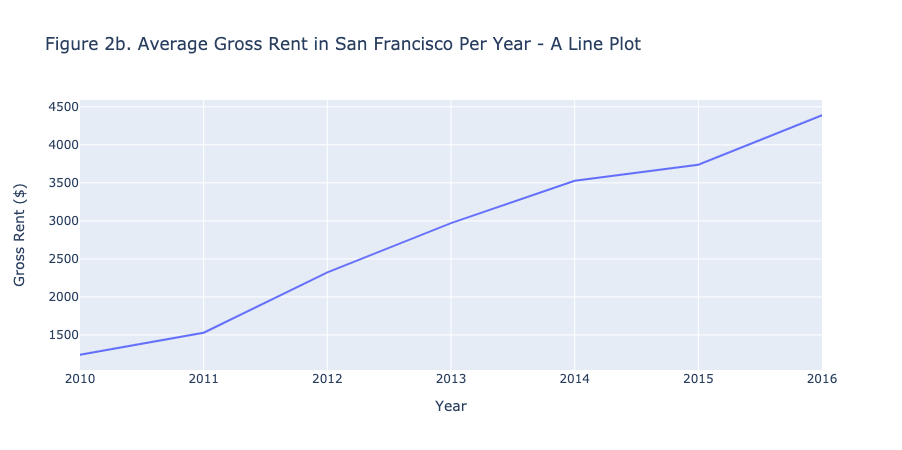

In [12]:
# Use plotly express for a line graph
plot_gross_rent_line = px.line(gross_rent_grp, x="year", y="gross_rent", 
                                title='Figure 2b. Average Gross Rent in San Francisco Per Year - A Line Plot',
                                range_y = [min, max],
                                labels={"year": "Year", "gross_rent": "Gross Rent ($)"}
)
plot_gross_rent_line

### Average Sales Price per Year

In [13]:
# Plot the Average Sales Price per Year as a line chart
# Slice for gross rent per year    
sales_price_grp = (
    sfo_data[["sale_price_sqr_foot"]] 
    .groupby([sfo_data.index])
    ).mean()
sales_price_grp.reset_index(inplace=True)   
sales_price_grp.head()

year  sale_price_sqr_foot
0  2010           369.344353
1  2011           341.903429
2  2012           399.389968
3  2013           483.600304
4  2014           556.277273

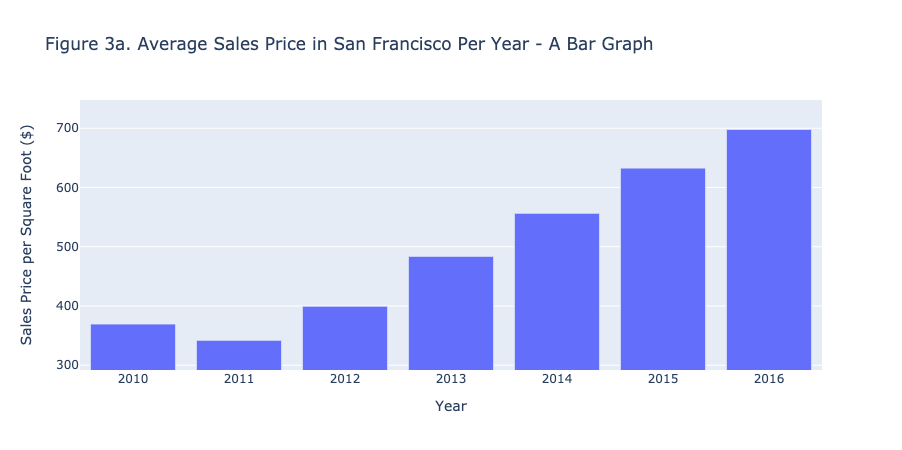

In [14]:
# Use plotly express for a bar chart
padding_sales = 50
min = sales_price_grp.min()["sale_price_sqr_foot"] - padding_sales
max = sales_price_grp.max()["sale_price_sqr_foot"] + padding_sales
    
plot_sales_price_bar = px.bar(
    sales_price_grp, x="year", y="sale_price_sqr_foot", title="Figure 3a. Average Sales Price in San Francisco Per Year - A Bar Graph",
    range_y = [min, max],
    labels={"year": "Year", "sale_price_sqr_foot": "Sales Price per Square Foot ($)"}
)
plot_sales_price_bar

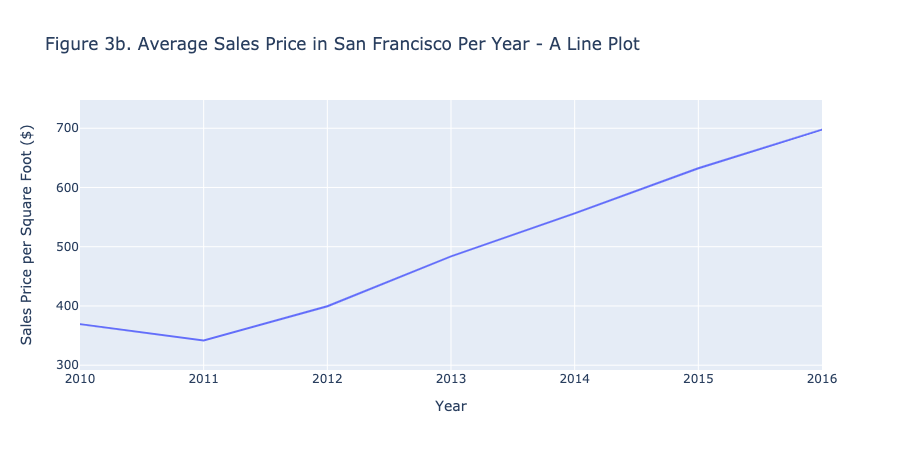

In [15]:
# Use plotly express for a line chart
plot_sales_price_line = px.line(sales_price_grp, x="year", y="sale_price_sqr_foot", 
                                title='Figure 3b. Average Sales Price in San Francisco Per Year - A Line Plot',
                                range_y = [min, max],
                                labels={"year": "Year", "sale_price_sqr_foot": "Sales Price per Square Foot ($)"},
)

plot_sales_price_line

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [16]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# Slice for sale price per squre foot by year and neighborhood 
sales_price_neighborhood_grp = (
    sfo_data[["sale_price_sqr_foot","neighborhood"]] 
    .groupby([sfo_data.index,sfo_data["neighborhood"]])
    ).mean()
sales_price_neighborhood_grp.reset_index(inplace=True)   
sales_price_neighborhood_grp.head()

year      neighborhood  sale_price_sqr_foot
0  2010      Alamo Square           291.182945
1  2010        Anza Vista           267.932583
2  2010           Bayview           170.098665
3  2010  Buena Vista Park           347.394919
4  2010  Central Richmond           319.027623

In [17]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
plot_sales_neighborhood_grp = sales_price_neighborhood_grp.hvplot.line(
    label="Figure 4. Annual Housing Sales Price Per Squre Foot in San Francisco Neighborhoods",
    x="year", y="sale_price_sqr_foot", rot=45,
    groupby='neighborhood',
    ).opts(yformatter="%.0f",
    line_color="black",
    hover_line_color="green",
    bgcolor="lightyellow")
plot_sales_neighborhood_grp

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [18]:
# Getting the data from the top 10 expensive neighborhoods
# Slice for housing units per year    
top_10_expensive = (
    sfo_data[["neighborhood","sale_price_sqr_foot"]] 
    .groupby(sfo_data["neighborhood"])
    ).mean()

top_10_expensive.reset_index(inplace=True)
top_10_expensive.sort_values(by="sale_price_sqr_foot", ascending=False, inplace=True)

top_10 = top_10_expensive.head(10)
top_10

neighborhood  sale_price_sqr_foot
65  Union Square District           903.993258
36         Merced Heights           788.844818
38          Miraloma Park           779.810842
51        Pacific Heights           689.555817
71          Westwood Park           687.087575
63         Telegraph Hill           676.506578
57       Presidio Heights           675.350212
10             Cow Hollow           665.964042
56           Potrero Hill           662.013613
60            South Beach           650.124479

In [19]:
# Plotting the data from the top 10 expensive neighborhoods
# Use rot and yformatter attributes/options
plot_top_10_bar = top_10.hvplot.bar(
    label="Figure 5. Top 10 Most Expensive Neighborhood in San Francisco - A Bar Chart",
    x="neighborhood", y="sale_price_sqr_foot", rot=45
    ).opts(yformatter="%.0f",
    line_color="black",
    hover_line_color="red",
    bgcolor="lightblue"
    )
plot_top_10_bar

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

In [20]:
# Parallel Coordinates Plot on the top 10 most profitable neighborhood to invest
# Data preparation
average = (sfo_data).groupby([sfo_data["neighborhood"]]).mean()
average.reset_index(inplace=True)
average.sort_values(by="sale_price_sqr_foot", ascending=False, inplace=True)
mean = average.head(10)
mean

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
65  Union Square District           903.993258      377427.50  2555.166667
36         Merced Heights           788.844818      380348.00  3414.000000
38          Miraloma Park           779.810842      375967.25  2155.250000
51        Pacific Heights           689.555817      378401.00  2817.285714
71          Westwood Park           687.087575      382295.00  3959.000000
63         Telegraph Hill           676.506578      378401.00  2817.285714
57       Presidio Heights           675.350212      378401.00  2817.285714
10             Cow Hollow           665.964042      378401.00  2817.285714
56           Potrero Hill           662.013613      378401.00  2817.285714
60            South Beach           650.124479      375805.00  2099.000000

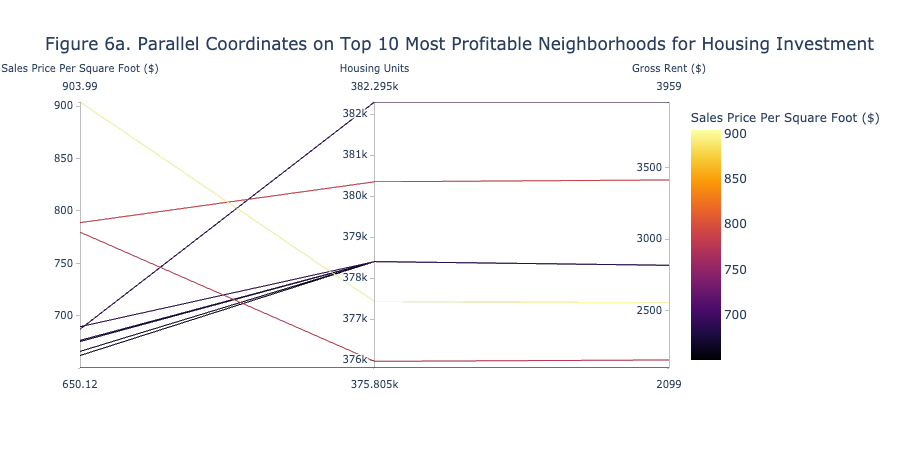

In [21]:
# 1. Parallel Coordinates Plot
plot_parallel_coordinates = px.parallel_coordinates(
        mean,
        dimensions=['sale_price_sqr_foot','housing_units', 'gross_rent'],
        color='sale_price_sqr_foot',
        color_continuous_scale=px.colors.sequential.Inferno,
        title='Figure 6a. Parallel Coordinates on Top 10 Most Profitable Neighborhoods for Housing Investment',
        labels={
            #"neighborhood": "Neighborhood", not showing up because it is not a numerical coordinate
            "sale_price_sqr_foot": "Sales Price Per Square Foot ($)",
            "housing_units": "Housing Units",
            "gross_rent": "Gross Rent ($)"
        }
    )
    
plot_parallel_coordinates

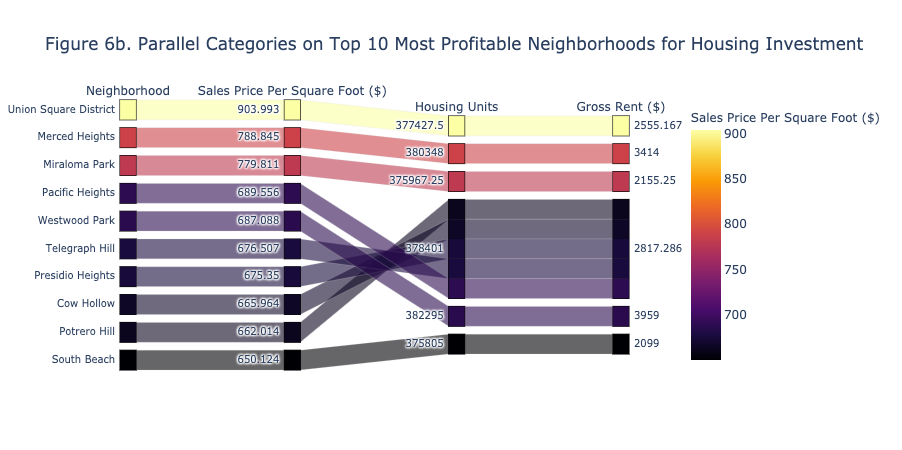

In [22]:
# 2. Parallel Categories Plot
plot_parallel_categories = px.parallel_categories(
        mean.round(3),
        dimensions=["neighborhood","sale_price_sqr_foot", "housing_units", "gross_rent"],
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.sequential.Inferno, 
        title='Figure 6b. Parallel Categories on Top 10 Most Profitable Neighborhoods for Housing Investment',
        labels={
            "neighborhood": "Neighborhood",
            "sale_price_sqr_foot": "Sales Price Per Square Foot ($)",
            "housing_units": "Housing Units",
            "gross_rent": "Gross Rent ($)"
        }
    )
    
plot_parallel_categories

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [23]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [24]:
# Calculate the mean values for each neighborhood
avg = (sfo_data).groupby([sfo_data["neighborhood"]]).mean()
avg.reset_index(inplace=True)
avg.head()

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0     Alamo Square           366.020712       378401.0  2817.285714
1       Anza Vista           373.382198       379050.0  3031.833333
2          Bayview           204.588623       376454.0  2318.400000
3  Bayview Heights           590.792839       382295.0  3739.000000
4  Bernal Heights            576.746488       379374.5  3080.333333

In [25]:
# Join the average values with the neighborhood locations
avg_neighborhood = pd.concat([df_neighborhood_locations,avg], axis=1, join="inner")
avg_neighborhood.head()

Neighborhood        Lat         Lon     neighborhood  \
0     Alamo Square  37.791012 -122.402100     Alamo Square   
1       Anza Vista  37.779598 -122.443451       Anza Vista   
2          Bayview  37.734670 -122.401060          Bayview   
3  Bayview Heights  37.728740 -122.410980  Bayview Heights   
4   Bernal Heights  37.728630 -122.443050  Bernal Heights    

   sale_price_sqr_foot  housing_units   gross_rent  
0           366.020712       378401.0  2817.285714  
1           373.382198       379050.0  3031.833333  
2           204.588623       376454.0  2318.400000  
3           590.792839       382295.0  3739.000000  
4           576.746488       379374.5  3080.333333

### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

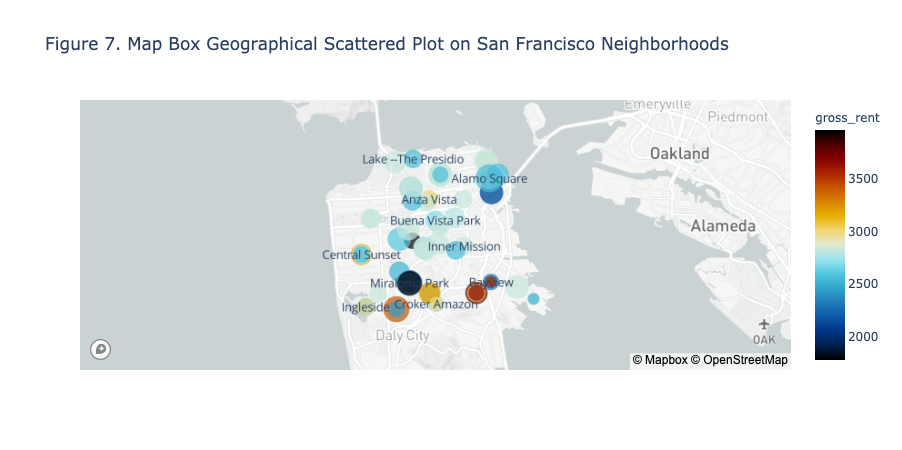

In [26]:
# Create a scatter mapbox to analyze neighborhood info
px.set_mapbox_access_token(mapbox_token)

geo_map = px.scatter_mapbox(
    avg_neighborhood,
    text="neighborhood",
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.IceFire, 
    zoom=10,
    title='Figure 7. Map Box Geographical Scattered Plot on San Francisco Neighborhoods'
)
geo_map

In [27]:
# Create a scatter mapbox to analyze neighborhood info
px.set_mapbox_access_token(mapbox_token)

geo_map = px.scatter_mapbox(
    avg_neighborhood,
    text="neighborhood",
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.IceFire, 
    zoom=10,
    title='Figure 7. Map Box Geographical Scattered Plot on San Francisco Neighborhoods'
)
geo_map

# References:
* CU GitLab Repository
* https://github.com/willwillis/python-pyviz-homework/blob/master/rental_analysis.ipynb
* https://plot.ly/python/line-charts/
* https://panel.holoviz.org/gallery/index.html
* https://plot.ly/python/plotly-express/
* https://www.youtube.com/watch?v=DAQNHzOcO5A
* https://stackoverflow.com/questions/59118664/lineplot-with-markers-in-holoviews-or-hvplot
* http://holoviews.org/user_guide/Plotting_with_Bokeh.html
* http://holoviews.org/user_guide/Customizing_Plots.html
* http://holoviews.org/user_guide/Styling_Plots.html
* http://holoviews.org/user_guide/Plotting_with_Bokeh.html